<a href="https://colab.research.google.com/github/RealYarik/ard/blob/main/prj3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card Fraud Detection

Credit card fraud is a growing issue with many challenges including temporal drift and heavy class imbalance.This project will help anticipate card fraud.



##Libraries

In [82]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight

from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv1D,MaxPooling2D,BatchNormalization,Flatten ,Bidirectional, LSTM, Dense, Input, Dropout,concatenate,GlobalMaxPooling1D, GlobalAveragePooling1D


#Create the Dataset
We use this DataSet https://www.kaggle.com/henriqueyamahata/bank-marketing

In [5]:
dataset = pd.read_csv('bank-additional-full.csv', sep = ';')
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
dataset.shape

(41188, 21)

In [7]:
dataset.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
for col in dataset:
    print(dataset[col].unique())

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
[ 261  149  226 ... 1246 1556 1868]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73af9b7f60>]],
      dtype=object)

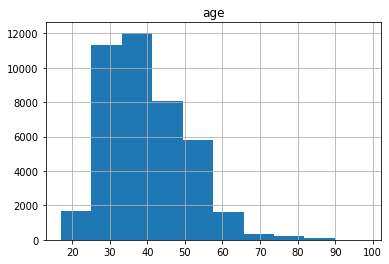

In [9]:
print(dataset['age'].unique())
dataset.hist(column='age')

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


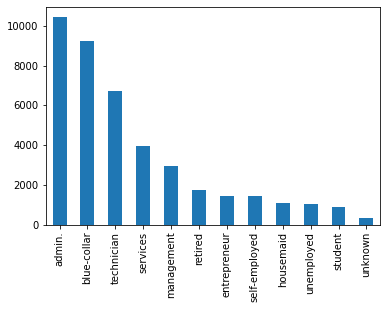

In [10]:
print(dataset['job'].unique())
dataset.job.value_counts().plot.bar()

['married' 'single' 'divorced' 'unknown']


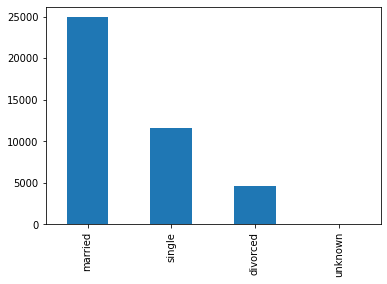

In [11]:
print(dataset['marital'].unique())
dataset.marital.value_counts().plot.bar()

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


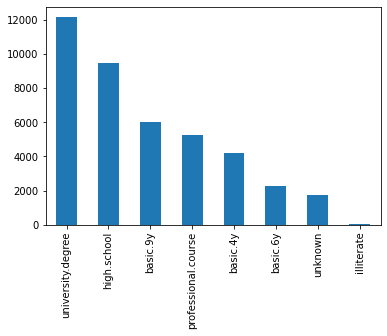

In [12]:
print(dataset['education'].unique())
dataset.education.value_counts().plot.bar()

['no' 'yes']
no     36548
yes     4640
Name: y, dtype: int64


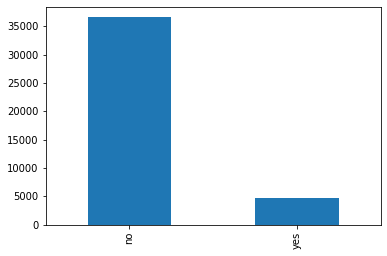

In [13]:
print(dataset['y'].unique())
print(dataset['y'].value_counts())
dataset.y.value_counts().plot.bar()

In [14]:
enc = LabelEncoder()

In [15]:
enc.fit(dataset['job'])
dataset['job'] = enc.transform(dataset['job'])

In [16]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


[ 3  7  0  1  9  5  4 10  6 11  2  8]


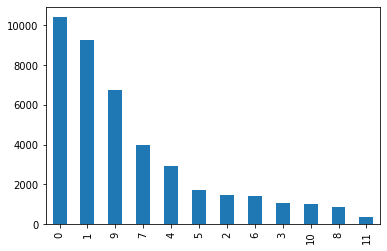

In [17]:
print(dataset['job'].unique())
dataset.job.value_counts().plot.bar()

In [18]:
# job                object
# marital            object
# education          object
# default            object
# housing            object
# loan               object
# contact            object
# month              object
# day_of_week        object
# poutcome           object
# y                  object

In [19]:
enc.fit(dataset['marital'])
dataset['marital'] = enc.transform(dataset['marital'])

enc.fit(dataset['education'])
dataset['education'] = enc.transform(dataset['education'])

enc.fit(dataset['default'])
dataset['default'] = enc.transform(dataset['default'])

enc.fit(dataset['housing'])
dataset['housing'] = enc.transform(dataset['housing'])

enc.fit(dataset['loan'])
dataset['loan'] = enc.transform(dataset['loan'])

enc.fit(dataset['contact'])
dataset['contact'] = enc.transform(dataset['contact'])

enc.fit(dataset['month'])
dataset['month'] = enc.transform(dataset['month'])

enc.fit(dataset['day_of_week'])
dataset['day_of_week'] = enc.transform(dataset['day_of_week'])

enc.fit(dataset['poutcome'])
dataset['poutcome'] = enc.transform(dataset['poutcome'])

enc.fit(dataset['y'])
dataset['y'] = enc.transform(dataset['y'])

In [20]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [21]:
for col in dataset:
    print(dataset[col].unique())

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
[ 3  7  0  1  9  5  4 10  6 11  2  8]
[1 2 0 3]
[0 3 1 2 5 7 6 4]
[0 1 2]
[0 2 1]
[0 2 1]
[1 0]
[6 4 3 1 8 7 2 5 0 9]
[1 3 4 2 0]
[ 261  149  226 ... 1246 1556 1868]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
[0 1 2 3 4 5 6 7]
[1 0 2]
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
[-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9

##Test and Train Data

In [22]:
X = dataset.drop('y', axis=1)
Y = dataset['y']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [24]:
print(x_train[0])

[ 4.0000e+01  1.0000e+00  1.0000e+00  2.0000e+00  1.0000e+00  2.0000e+00
  0.0000e+00  1.0000e+00  3.0000e+00  1.0000e+00  9.4000e+01  2.0000e+00
  9.9900e+02  0.0000e+00  1.0000e+00  1.4000e+00  9.3918e+01 -4.2700e+01
  4.9600e+00  5.2281e+03]


In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 20)
(8238, 20)
(32950,)
(8238,)


In [26]:
np.std(x_train, axis=0)

array([ 10.4356835 ,   3.59080716,   0.61138253,   2.13799966,
         0.40630606,   0.98498304,   0.72406341,   0.48136414,
         2.31770911,   1.39794915, 259.45592604,   2.77809613,
       186.24541873,   0.49298449,   0.36325178,   1.56998695,
         0.57914854,   4.62261257,   1.73370872,  72.35352668])

In [27]:
np.mean(x_train, axis=0)

array([ 4.00174203e+01,  3.72033384e+00,  1.17365706e+00,  3.74916540e+00,
        2.08285281e-01,  1.07207891e+00,  3.28345979e-01,  3.64764795e-01,
        4.23183612e+00,  2.00570561e+00,  2.57746313e+02,  2.57295903e+00,
        9.62745341e+02,  1.72989378e-01,  9.29195751e-01,  8.31047041e-02,
        9.35768353e+01, -4.05145736e+01,  3.62269757e+00,  5.16709405e+03])

In [28]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train, y_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
np.std(x_train_scaled, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [30]:
np.allclose(np.mean(x_train_scaled, axis=0), 0, rtol=1e-17)

True

##Model.Compile.Train.Results.Predict


In [90]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(20,)))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', input_shape=(20,)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', input_shape=(20,)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu', input_shape=(20,)))
model.add(Dense(1, activation='sigmoid'))

In [84]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d (MaxPooling2D) (None, 2, 2, 1)           0         
_________________________________________________________________
dense_58 (Dense)             (None, 2, 2, 128)         256       
_________________________________________________________________
batch_normalization_29 (Batc (None, 2, 2, 128)         512       
_________________________________________________________________
dense_59 (Dense)             (None, 2, 2, 128)         16512     
_________________________________________________________________
batch_normalization_30 (Batc (None, 2, 2, 128)         512       
_________________________________________________________________
dense_60 (Dense)             (None, 2, 2, 64)          8256      
_________________________________________________________________
batch_normalization_31 (Batc (None, 2, 2, 64)        

In [91]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [92]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1030/1030 [==============================] - 6s 5ms/step - loss: 0.2483 - val_loss: 0.2711
Epoch 2/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2154 - val_loss: 0.2314
Epoch 3/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2073 - val_loss: 0.4625
Epoch 4/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2030 - val_loss: 0.2697
Epoch 5/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2024 - val_loss: 0.2285
Epoch 6/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2010 - val_loss: 0.3874
Epoch 7/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2004 - val_loss: 0.2912
Epoch 8/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2009 - val_loss: 0.7157
Epoch 9/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2007 - val_loss: 0.3359
Epoch 10/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.201

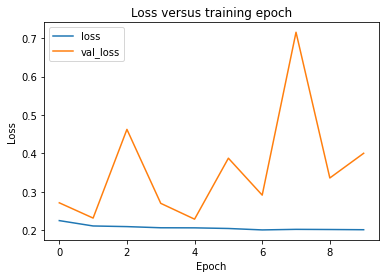

In [93]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss versus training epoch')
plt.show()

In [94]:
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [95]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7303
           1       0.71      0.27      0.40       935

    accuracy                           0.90      8238
   macro avg       0.81      0.63      0.67      8238
weighted avg       0.89      0.90      0.89      8238



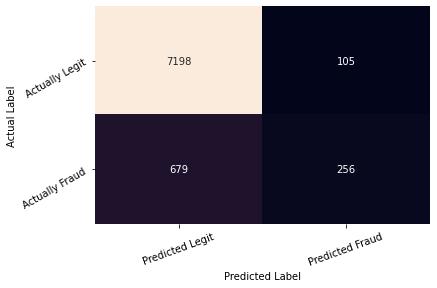

In [96]:
classes = ['Legit', 'Fraud']
predicted_classes = ['Predicted ' + item for item in classes]
actual_classes = ['Actually ' + item for item in classes]

conf_df = pd.DataFrame(data=confusion_matrix(y_test, predictions), columns=predicted_classes, index=actual_classes)

sns.heatmap(conf_df,annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.xticks(rotation=20)
plt.yticks(rotation=30)
plt.show()

##Model2.Compile.Train.Results.Predict


In [98]:

model2 = Sequential()
model2.add(Dense(12, activation='relu', input_shape=(20,)))
model2.add(BatchNormalization())
model2.add(Dense(12, activation='relu', input_shape=(20,)))
model2.add(BatchNormalization())
model2.add(Dense(12, activation='relu', input_shape=(20,)))
model2.add(BatchNormalization())
model2.add(Dense(12, activation='softmax', input_shape=(20,)))
model2.add(Dense(1, activation='sigmoid'))


In [99]:
model2.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 12)                252       
_________________________________________________________________
batch_normalization_41 (Batc (None, 12)                48        
_________________________________________________________________
dense_79 (Dense)             (None, 12)                156       
_________________________________________________________________
batch_normalization_42 (Batc (None, 12)                48        
_________________________________________________________________
dense_80 (Dense)             (None, 12)                156       
_________________________________________________________________
batch_normalization_43 (Batc (None, 12)                48        
_________________________________________________________________
dense_81 (Dense)             (None, 12)              

In [100]:
model2.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [101]:
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

In [102]:
print(class_weights)

[0.56334416 4.44669366]


In [103]:
cw = {0: class_weights[0], 1: class_weights[1]}

In [104]:
history2 = model2.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    class_weight=cw)

Epoch 1/10
1030/1030 [==============================] - 6s 5ms/step - loss: 0.5678 - val_loss: 0.4301
Epoch 2/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.4167 - val_loss: 0.8843
Epoch 3/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.3821 - val_loss: 0.6228
Epoch 4/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.3603 - val_loss: 0.3860
Epoch 5/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.3652 - val_loss: 0.2371
Epoch 6/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.3485 - val_loss: 0.5364
Epoch 7/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.3564 - val_loss: 0.9691
Epoch 8/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.3455 - val_loss: 1.1118
Epoch 9/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.3519 - val_loss: 0.3049
Epoch 10/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.348

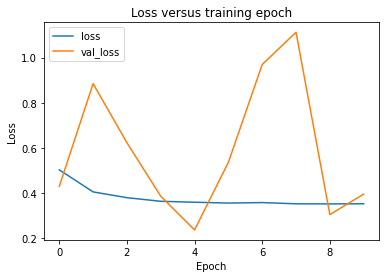

In [105]:
losses = pd.DataFrame(model2.history.history)
losses.plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss versus training epoch')
plt.show()

In [106]:
predictions = model2.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [107]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.78      0.88      7303
           1       0.36      0.94      0.52       935

    accuracy                           0.80      8238
   macro avg       0.67      0.86      0.70      8238
weighted avg       0.92      0.80      0.83      8238



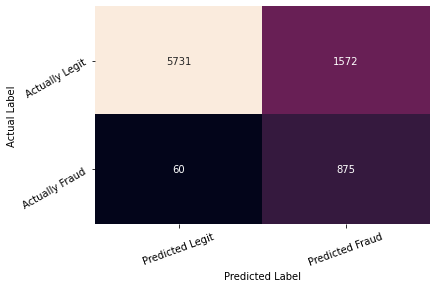

In [108]:
classes = ['Legit', 'Fraud']
predicted_classes = ['Predicted ' + item for item in classes]
actual_classes = ['Actually ' + item for item in classes]

conf_df = pd.DataFrame(data=confusion_matrix(y_test, predictions), columns=predicted_classes, index=actual_classes)

sns.heatmap(conf_df,annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.xticks(rotation=20)
plt.yticks(rotation=30)
plt.show()

##Conclusion

We analyzed and predicted card fraud. If we develop this direction, then it is quite possible to achieve good results.